In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
d = pd.read_csv('historic_demand_2009_2024_noNaN.csv')

In [59]:
data = pd.read_csv('historic_demand_2009_2024_noNaN.csv')
data['settlement_date'] = pd.to_datetime(data['settlement_date'])

display(data.head())
display(data.info())
display(data.isna().sum())

,settlement_date,settlement_period,period_hour,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday
0,2009-01-01 00:00:00,1,0:00:00,37910,38704,33939,54,1403,0,0,0,33,2002,0,0,-161,0,0,1
1,2009-01-01 00:30:00,2,0:30:00,38047,38964,34072,53,1403,0,0,0,157,2002,0,0,-160,0,0,1
2,2009-01-01 01:00:00,3,1:00:00,37380,38651,33615,53,1403,0,0,0,511,2002,0,0,-160,0,0,1
3,2009-01-01 01:30:00,4,1:30:00,36426,37775,32526,50,1403,0,0,0,589,1772,0,0,-160,0,0,1
4,2009-01-01 02:00:00,5,2:00:00,35687,37298,31877,50,1403,0,0,0,851,1753,0,0,-160,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270112 entries, 0 to 270111
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   settlement_date            270112 non-null  datetime64[ns]
 1   settlement_period          270112 non-null  int64         
 2   period_hour                270112 non-null  object        
 3   nd                         270112 non-null  int64         
 4   tsd                        270112 non-null  int64         
 5   england_wales_demand       270112 non-null  int64         
 6   embedded_wind_generation   270112 non-null  int64         
 7   embedded_wind_capacity     270112 non-null  int64         
 8   embedded_solar_generation  270112 non-null  int64         
 9   embedded_solar_capacity    270112 non-null  int64         
 10  non_bm_stor                270112 non-null  int64         
 11  pump_storage_pumping       270112 non-null  int64   

None

settlement_date              0
settlement_period            0
period_hour                  0
nd                           0
tsd                          0
england_wales_demand         0
embedded_wind_generation     0
embedded_wind_capacity       0
embedded_solar_generation    0
embedded_solar_capacity      0
non_bm_stor                  0
pump_storage_pumping         0
ifa_flow                     0
ifa2_flow                    0
britned_flow                 0
moyle_flow                   0
east_west_flow               0
nemo_flow                    0
is_holiday                   0
dtype: int64

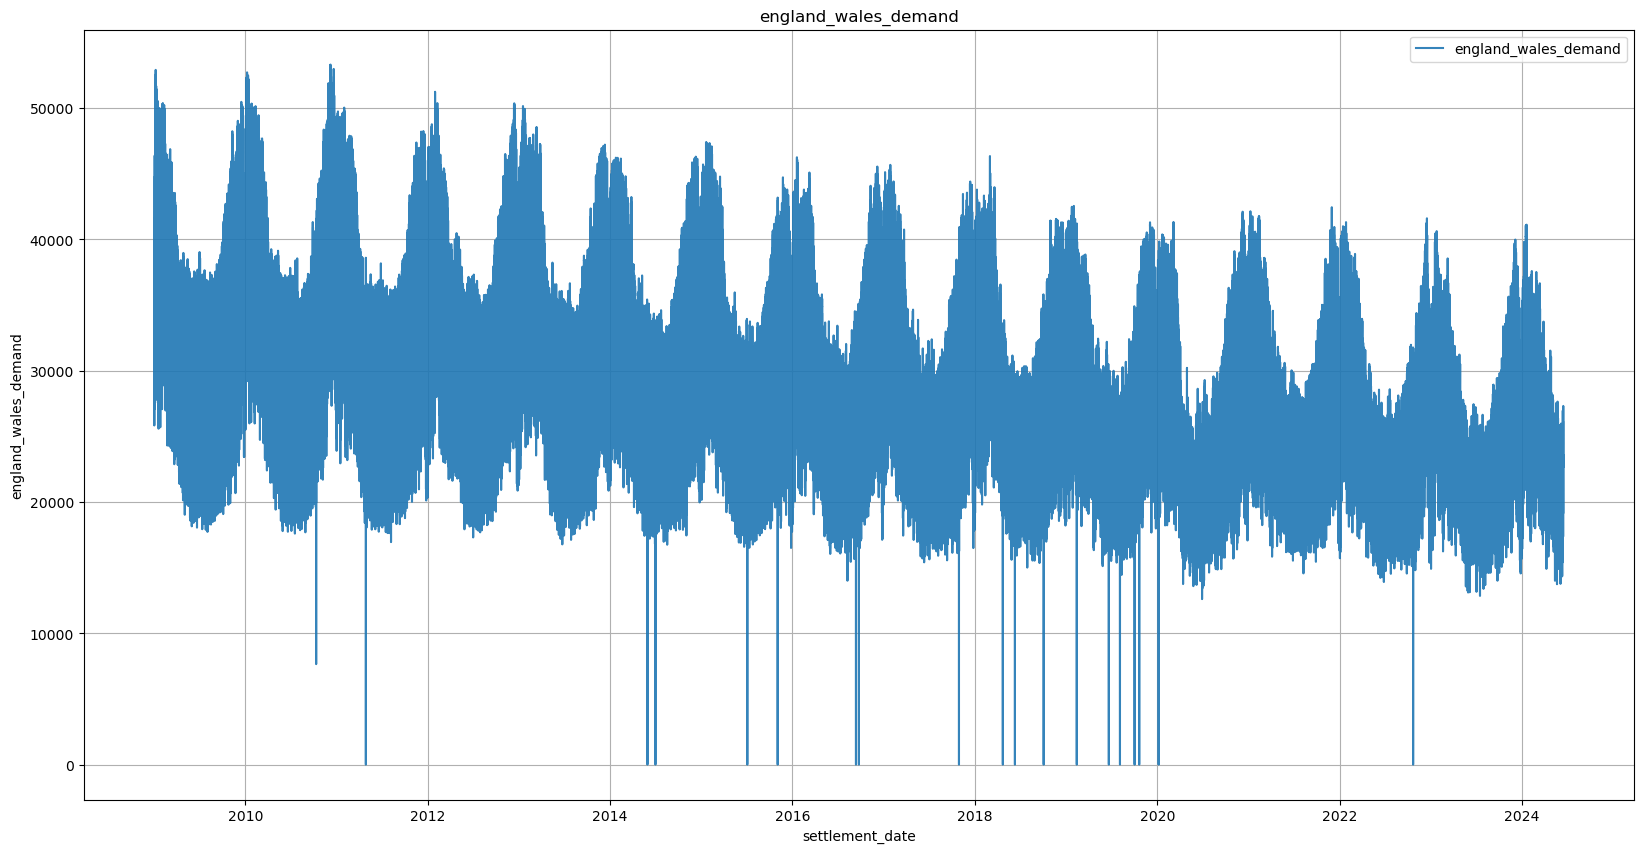

In [60]:
plt.figure(figsize=(20, 10))
sns.lineplot(x='settlement_date', y="england_wales_demand", data=data, label="england_wales_demand", alpha = 0.9) 
plt.title("england_wales_demand")
plt.grid(True)
plt.legend()
plt.plot();

In [61]:
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.tsa.seasonal import seasonal_decompose

In [63]:
data.set_index("settlement_date", inplace=True)
data.isna().sum()

settlement_period            0
period_hour                  0
nd                           0
tsd                          0
england_wales_demand         0
embedded_wind_generation     0
embedded_wind_capacity       0
embedded_solar_generation    0
embedded_solar_capacity      0
non_bm_stor                  0
pump_storage_pumping         0
ifa_flow                     0
ifa2_flow                    0
britned_flow                 0
moyle_flow                   0
east_west_flow               0
nemo_flow                    0
is_holiday                   0
dtype: int64

In [68]:
data = data.asfreq('30min')

In [75]:
data.isna()['settlement_period'].values

array([False, False, False, ..., False, False, False])

In [82]:
data[data.isna()['settlement_period'].values].index

DatetimeIndex(['2009-03-29 23:00:00', '2009-03-29 23:30:00',
               '2009-08-29 00:00:00', '2009-08-29 00:30:00',
               '2009-08-29 01:00:00', '2009-08-29 01:30:00',
               '2009-08-29 02:00:00', '2009-08-29 02:30:00',
               '2009-08-29 03:00:00', '2009-08-29 03:30:00',
               ...
               '2020-03-29 23:00:00', '2020-03-29 23:30:00',
               '2021-03-28 23:00:00', '2021-03-28 23:30:00',
               '2022-03-27 23:00:00', '2022-03-27 23:30:00',
               '2023-03-26 23:00:00', '2023-03-26 23:30:00',
               '2024-03-31 23:00:00', '2024-03-31 23:30:00'],
              dtype='datetime64[ns]', name='settlement_date', length=752, freq=None)

In [84]:
data['england_wales_demand'] = data['england_wales_demand'].replace(0.0, np.nan)

,settlement_period,period_hour,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday
settlement_date,,,,,,,,,,,,,,,,,,
2011-04-28 09:30:00,20.0,9:30:00,38880.0,39791.0,0.0,311.0,1761.0,34.0,152.0,0.0,0.0,0.0,0.0,102.0,-411.0,0.0,0.0,0.0
2014-05-30 03:30:00,8.0,3:30:00,22750.0,23615.0,0.0,485.0,3665.0,0.0,4772.0,0.0,0.0,0.0,0.0,999.0,-127.0,-238.0,0.0,0.0
2014-07-01 03:30:00,8.0,3:30:00,22250.0,22920.0,0.0,191.0,3575.0,0.0,4948.0,0.0,0.0,0.0,0.0,963.0,-170.0,148.0,0.0,0.0
2015-07-04 01:30:00,4.0,1:30:00,21560.0,22060.0,0.0,1503.0,3897.0,0.0,8713.0,0.0,0.0,0.0,0.0,792.0,152.0,140.0,0.0,0.0
2015-11-02 15:00:00,31.0,15:00:00,39630.0,40230.0,0.0,473.0,4013.0,674.0,8965.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-09-11 05:00:00,11.0,5:00:00,18430.0,18930.0,0.0,950.0,4403.0,0.0,11433.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-09-22 21:00:00,43.0,21:00:00,33680.0,34180.0,0.0,1255.0,4649.0,0.0,11433.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-10-28 16:30:00,34.0,16:30:00,29790.0,30290.0,0.0,4001.0,5305.0,550.0,12372.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-04-22 07:30:00,16.0,7:30:00,21830.0,22330.0,0.0,1436.0,5978.0,1580.0,13052.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


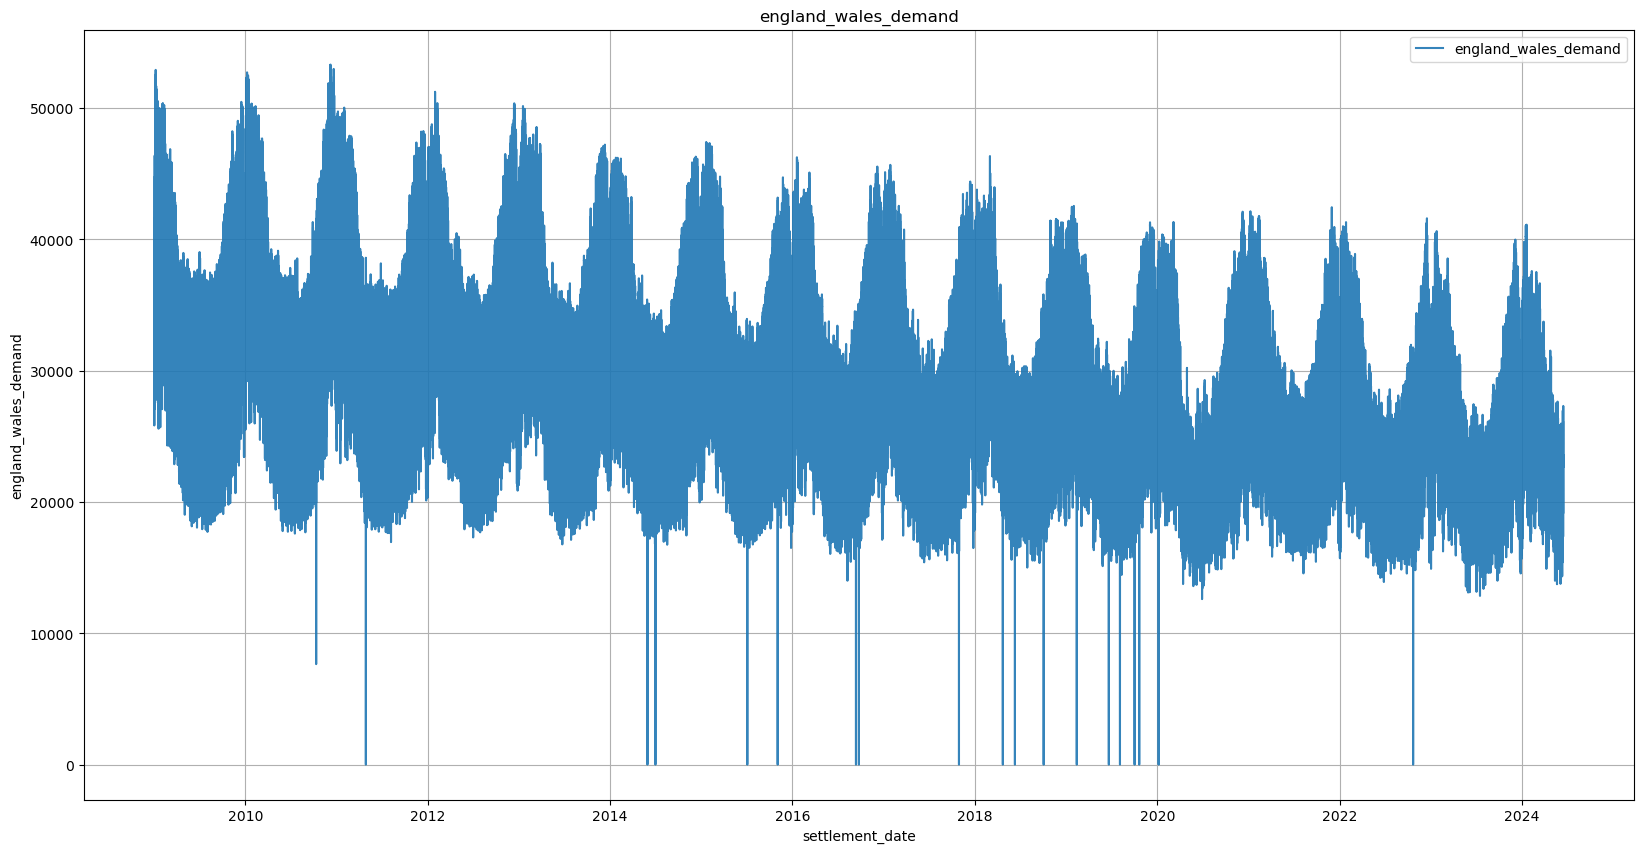

In [83]:
plt.figure(figsize=(20, 10))
sns.lineplot(x='settlement_date', y="england_wales_demand", data=data, label="england_wales_demand", alpha = 0.9) 
plt.title("england_wales_demand")
plt.grid(True)
plt.legend()
plt.plot();

In [67]:
result = seasonal_decompose(data['england_wales_demand'], model='additive', period=48)  # or use model='multiplicative'
result.plot()
plt.show()

ValueError: This function does not handle missing values